<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/opencv/%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/images'
fn = 'dog.jpg'

src


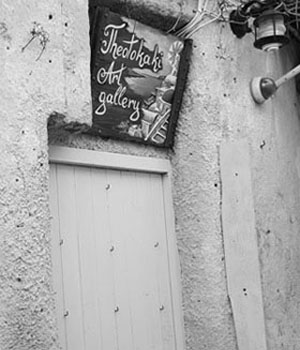

mag


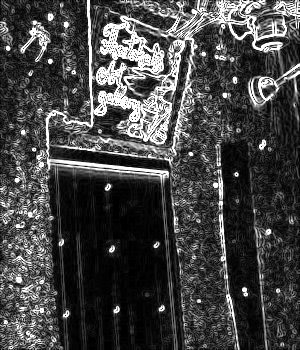

dst


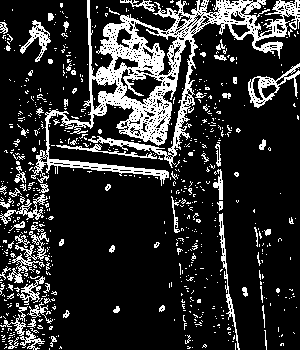

In [10]:
import cv2
import numpy as np

src = cv2.imread(os.path.join(path, fn), cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0) # float 형태의 미분값을 저장
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy) # 그래디언트 크기
mag = np.clip(mag, 0, 255).astype(np.uint8) # 255보다 커질 수 있으므로 saturate 연산

# 흰색과 검은색으로만 나타내는 윤곽선 생성
dst = np.zeros(src.shape[:2], np.uint8) # 0(검은색)으로 채워져 있는 영상 생성
dst[mag > 120] = 255 # 120은 임계값, 값을 적절하게 설정하면 내가 원하는 부분만 나타낼 수 있음

# dst = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY) # cv2 함수로 임계값 설정하기

print("src")
cv2_imshow(src)
print("mag")
cv2_imshow(mag)
print("dst")
cv2_imshow(dst)


src.shape (350, 300)
mag.shape (350, 300)
dst[1].shape (350, 300)
(120.0, array([[  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))
src


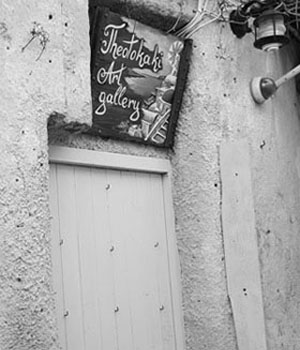

mag


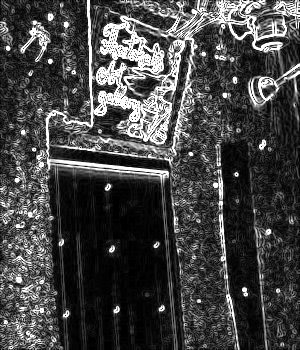

dst


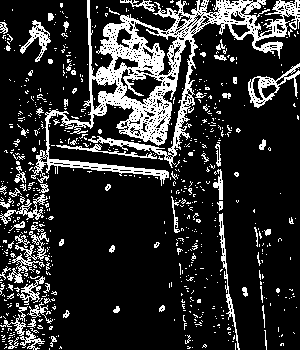

In [13]:
import cv2
import numpy as np

src = cv2.imread(os.path.join(path, fn), cv2.IMREAD_GRAYSCALE)
print("src.shape",src.shape)
if src is None:
    print('Image load failed!')
    sys.exit()

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0) # float 형태의 미분값을 저장
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy) # 그래디언트 크기
mag = np.clip(mag, 0, 255).astype(np.uint8) # 255보다 커질 수 있으므로 saturate 연산
print("mag.shape",mag.shape)

# 흰색과 검은색으로만 나타내는 윤곽선 생성
# dst = np.zeros(src.shape[:2], np.uint8) # 0(검은색)으로 채워져 있는 영상 생성
# dst[mag > 120] = 255 # 120은 임계값, 값을 적절하게 설정하면 내가 원하는 부분만 나타낼 수 있음

dst = cv2.threshold(mag, 120, 255, cv2.THRESH_BINARY) # cv2 함수로 임계값 설정하기
print("dst[1].shape",dst[1].shape)
print(dst)

print("src")
cv2_imshow(src)
print("mag")
cv2_imshow(mag)
print("dst")
cv2_imshow(dst[1])
